<a href="https://colab.research.google.com/github/kaiyoken3618/EnamulHaqChowdhury/blob/main/10class_image_classification_softcompute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library import

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout 
from tensorflow.keras import layers  
from keras.utils import to_categorical 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')   

Dataset(cifar 10) loading

In [ ]:
from keras.datasets import cifar10 
(x_train,y_train),(x_test,y_test) = cifar10.load_data() 

170500096/170498071 [==============================] - 8s 0us/step


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_train shape: (50000, 32, 32, 3)
y_test shape: (10000, 1)


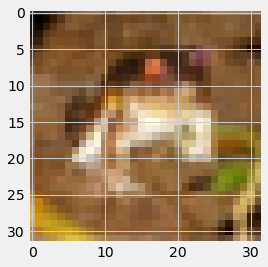

In [ ]:
print('x_train shape:',x_train.shape)  
print('y_train shape:',y_train.shape) 
print('x_train shape:',x_train.shape) 
print('y_test shape:',y_test.shape) 
img=plt.imshow(x_train[0])


Classification

In [ ]:
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] 


converting labels into set of 10 numbers to input into neural network


In [ ]:
y_train_one_hot=to_categorical(y_train) 
y_test_one_hot=to_categorical(y_test) 


Normalizing the pixel values between 0 to 1

In [ ]:
x_train=x_train/255 
x_test=x_test/255

Model Architecture

In [ ]:
model=Sequential() 
 
#1st layer(convolution layer to extract features from input image**input_shape given because 1st layer(32*32 with depth 3)**) 
model.add(  Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)) )  
 
#2nd layer(pooling layer to get the max elemnt from the feature maps) 
model.add(MaxPooling2D(pool_size=(2,2)))  
 
#another convolution layer 
model.add(  Conv2D(32,(5,5),activation='relu') )   

#another pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))   

#Flattening layer(to reduce dimnension to get linear array) 
model.add(Flatten())   
 
#Layer with 1000 neurons 
model.add(Dense(1000,activation='relu'))   
 
#drop out layer(to avoid overfitting) 
model.add(Dropout(0.5))  

#**another** 

#Layer with 500 neurons 
model.add(Dense(500,activation='relu'))   
 
#drop out layer(to avoid overfitting) 
model.add(Dropout(0.5)) 
  
#Layer with 250 neurons 
model.add(Dense(250,activation='relu'))  
 
#Layer with 10 neurons(10 class) 
model.add(Dense(10,activation='softmax'))  





compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

Train model and splitting 20% into validation set

In [ ]:
hist=model.fit(x_train,y_train_one_hot, 
               batch_size=256, 
               epochs =10,
               validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 3s 20ms/step - loss: 1.7824 - accuracy: 0.3354 - val_loss: 1.4767 - val_accuracy: 0.4610
Epoch 2/10
157/157 [==============================] - 3s 16ms/step - loss: 1.3971 - accuracy: 0.4902 - val_loss: 1.3760 - val_accuracy: 0.5081
Epoch 3/10
157/157 [==============================] - 3s 16ms/step - loss: 1.2429 - accuracy: 0.5519 - val_loss: 1.1758 - val_accuracy: 0.5836
Epoch 4/10
157/157 [==============================] - 2s 16ms/step - loss: 1.1382 - accuracy: 0.5937 - val_loss: 1.1031 - val_accuracy: 0.6044
Epoch 5/10
157/157 [==============================] - 3s 16ms/step - loss: 1.0536 - accuracy: 0.6248 - val_loss: 1.0407 - val_accuracy: 0.6272
Epoch 6/10
157/157 [==============================] - 3s 16ms/step - loss: 0.9729 - accuracy: 0.6568 - val_loss: 1.0276 - val_accuracy: 0.6340
Epoch 7/10
157/157 [==============================] - 3s 16ms/step - loss: 0.9060 - accuracy: 0.6801 - val_loss: 0.9693 - val_accuracy: 0.6606

Evaluate Model using test dataset

In [ ]:
pred=model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.9412 - accuracy: 0.6751


Model accuracy graph

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper leftt'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


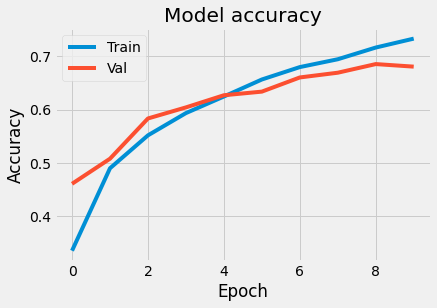

In [ ]:
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('Model accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'],loc='upper leftt') 
plt.show()

Model Loss graph

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper rightt'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


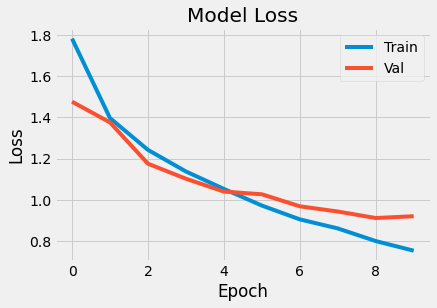

In [ ]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'],loc='upper rightt') 
plt.show()

Test with input image

In [ ]:
from google.colab import files 
uploaded = files.upload() 

In [ ]:
#image show 
new_image= plt.imread('horse.jpg') 
img=plt.imshow(new_image)

NameError: ignored

Resize to 32*32

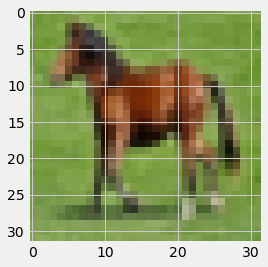

In [ ]:
from skimage.transform import resize 
resized_image=resize(new_image,(32,32,3))
img=plt.imshow(resized_image) 

predict result

In [ ]:
predictions=model.predict(np.array([resized_image])) 
predictions  

array([[4.41011139e-08, 2.77046097e-09, 1.72774362e-05, 3.02174908e-06,
        2.89089303e-03, 1.07097265e-04, 1.59714901e-07, 9.96981561e-01,
        1.62874381e-10, 3.69400404e-08]], dtype=float32)

In [ ]:
#sorting predictions from least to greatest 
list_index=[0,1,2,3,4,5,6,7,8,9] 
x=predictions 
 
for i in range (10): 
  for j in range (10): 
    if x[0][list_index[i]] > x[0][list_index[j]]: 
      temp=list_index[i] 
      list_index[i]=list_index[j] 
      list_index[j]=temp 
       
print(list_index)  
 
#printing top 5 predictions 
for i in range (5): 
  print(classification[list_index[i]], ':',round(predictions[0][list_index[i]]*100,2),'%') 


[7, 4, 5, 2, 3, 6, 0, 9, 1, 8]
horse : 99.7 %
deer : 0.29 %
dog : 0.01 %
bird : 0.0 %
cat : 0.0 %


Prediction array 


In [ ]:
y_predict = np.empty((0,1),dtype=np.float64)
for i in range(len(x_test)):
  predict = model.predict(np.array([x_test[i]]))
  result = np.where(predict == np.amax(predict))
  y_predict = np.append(y_predict, result[1])  
print(y_predict)

[3. 1. 8. ... 5. 1. 7.]


confusion mattrix

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y_test, y_predict) 
pd.set_option('display.max_columns', 10)
df = pd.DataFrame(c, columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], 
                  index=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])  
print(df )

            airplane  automobile  bird  cat  deer  dog  frog  horse  ship  \
airplane         813          18    31    9     5    2     2      3    81   
automobile        36         808     3    4     2    0     6      1    48   
bird             128           9   621   65    54   38    22     17    31   
cat               62          20   143  466    41  115    29     38    53   
deer              84           6   205   63   481   15    24     80    29   
dog               52           6   131  225    25  453    14     50    27   
frog              26          35   138   85    43   17   590      8    24   
horse             56          11    63   38    54   46     2    689     4   
ship             111          43    12    8     3    2     1      4   795   
truck             56         114     8   12     4    2     7      7    49   

            truck  
airplane       36  
automobile     92  
bird           15  
cat            33  
deer           13  
dog            17  
frog        

benchmark

In [ ]:
from sklearn import metrics
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'hourse', 'ship', 'truck']
print(metrics.classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    airplane       0.57      0.81      0.67      1000
  automobile       0.76      0.81      0.78      1000
        bird       0.46      0.62      0.53      1000
         cat       0.48      0.47      0.47      1000
        deer       0.68      0.48      0.56      1000
         dog       0.66      0.45      0.54      1000
        frog       0.85      0.59      0.70      1000
      hourse       0.77      0.69      0.73      1000
        ship       0.70      0.80      0.74      1000
       truck       0.71      0.74      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.64     10000
weighted avg       0.66      0.65      0.64     10000

